#SVM on breast cancer dataset

In [6]:
import pandas as pd
df=pd.read_csv("breastcancer.csv")
pd.set_option('display.max_columns',100)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df.isna().sum()
#fractal_dimension_worst,fractal_dimension_se 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df['diagnosis'].groupby(df['diagnosis']).sum()
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

0      1
1      0
2      0
3      1
4      0
      ..
564    0
565    0
566    0
567    1
568    0
Name: fractal_dimension_worst, Length: 569, dtype: int32

In [10]:
x=df.drop(columns=['id'])
y=df['diagnosis']

In [11]:
x=x.astype(int)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)
from sklearn.svm import SVC
sv=SVC(kernel='linear',C=0.001)
sv.fit(X_train,Y_train)
pred=sv.predict(X_test)
print(pred)

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0]


In [13]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,Y_test)
print("Accuracy:",acc)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)
print("Confusion matrix:\n",cm)
from sklearn.metrics import classification_report
cr=classification_report(Y_test,pred)
print("Classification report:\n",cr)

Accuracy: 0.916083916083916
Confusion matrix:
 [[90  7]
 [ 5 41]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        97
           1       0.85      0.89      0.87        46

    accuracy                           0.92       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.92      0.92      0.92       143



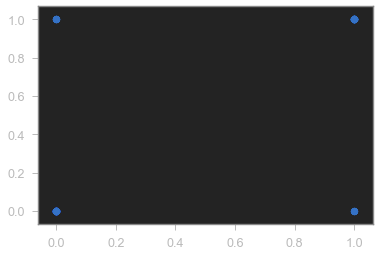

In [14]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,pred)